In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.__version__

'1.0.3'

In [2]:
file = pd.read_csv('FirstConcat.csv')

In [3]:
#Working with a copy just in case
copy = pd.DataFrame(file)

In [4]:
#I want to be able to access day for grouping. also hour...
day = []
hour = []
ampm = []
hour_int = []
print(copy)

               Time Stamp  Dual Fuel   Hydro  Natural Gas  Nuclear  \
0     08/01/2019 00:05:00     4482.0  2503.0       3585.0   5233.0   
1     08/01/2019 00:10:00     4454.0  2426.0       3514.0   5231.0   
2     08/01/2019 00:15:00     4447.0  2294.0       3500.0   5233.0   
3     08/01/2019 00:20:00     4355.0  2196.0       3471.0   5233.0   
4     08/01/2019 00:25:00     4247.0  2137.0       3411.0   5233.0   
...                   ...        ...     ...          ...      ...   
9011  08/31/2019 23:35:00     2695.0  2997.0       2358.0   5297.0   
9012  08/31/2019 23:40:00     2656.0  2991.0       2335.0   5300.0   
9013  08/31/2019 23:45:00     2620.0  2972.0       2285.0   5298.0   
9014  08/31/2019 23:50:00     2534.0  2955.0       2242.0   5301.0   
9015  08/31/2019 23:55:00     2463.0  2883.0       2239.0   5301.0   

      Other Fossil Fuels  Other Renewables   Wind  
0                   51.0             261.0   68.0  
1                   51.0             263.0   67.0  
2  

In [5]:
for i in range(len(copy['Time Stamp'])):
    day.append(int(copy['Time Stamp'][i].split(' ')[0].split('/')[1]))
    time = copy['Time Stamp'][i].split(' ')[1].split(':')
    hours = int(time[0])
    hour_int.append(hours)
    mins = int(time[1])
    secs = int(time[2])
    num = hours + mins/60 + secs/3600
    hour.append(num)
    if int(hours) < 12:
        ampm.append('AM')
    else:
        ampm.append('PM')

In [6]:
copy['Time Stamp'][0].split(' ')[1].split(':')

['00', '05', '00']

In [7]:
copy['day'] = day
copy['hour'] = hour
copy['ampm'] = ampm
copy['hour_int'] = hour_int

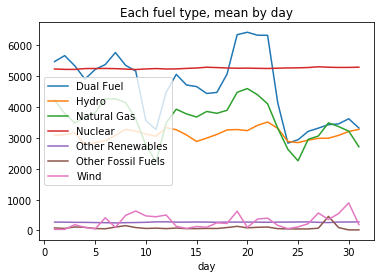

In [8]:
copy.groupby('day').mean()[['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Renewables','Other Fossil Fuels','Wind']].plot();
plt.title('Each fuel type, mean by day')
plt.show()

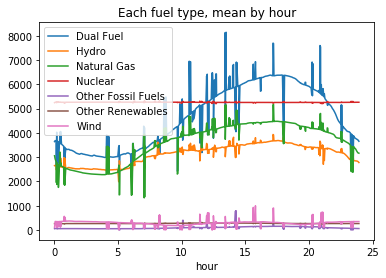

In [9]:
copy.groupby('hour').mean()[['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Fossil Fuels',
                           'Other Renewables','Wind']].plot();
plt.title('Each fuel type, mean by hour')
plt.show()

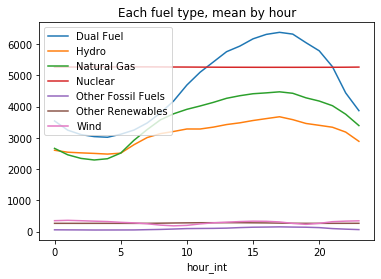

In [10]:
copy.groupby('hour_int').mean()[['Dual Fuel','Hydro','Natural Gas','Nuclear','Other Fossil Fuels',
                           'Other Renewables','Wind']].plot();
plt.title('Each fuel type, mean by hour')
plt.show()

In [11]:
#Great. some working plots. I want to add day of week too, that should be relevant
#August 1, 2019 was a thursday, so lets use some mods to add those labels
dayslist = ['Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
augdays = []

In [12]:
for i in range(len(copy['day'])):
    augdays.append(dayslist[copy['day'][i] % 7])

In [13]:
copy['DoW'] = augdays

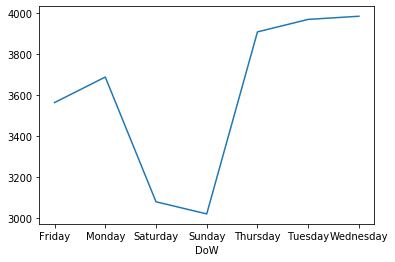

In [14]:
copy.groupby('DoW').mean()['Natural Gas'].plot()

In [15]:
#cool. We need emissions as well.
emfactor = dict({'Dual Fuel': 0.444, 'Natural Gas': 0.426, 'Other Fossil Fuels': 0.935, 'Other Renewables': 0.256})

In [16]:
#We should add emissions for each fuel type as well as total by day.

In [17]:
firstDayTest = copy[copy['day'] == 1]

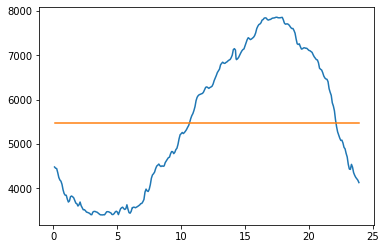

In [18]:
plt.plot(firstDayTest['hour'], firstDayTest['Dual Fuel'])
plt.plot(firstDayTest['hour'], np.repeat(firstDayTest['Dual Fuel'].mean(), 290))

In [19]:
#should we integrate or use mean?
print(firstDayTest['Dual Fuel'].mean() * 24)

131492.0275862069


In [20]:
a = np.trapz(firstDayTest['Dual Fuel'], x = firstDayTest['hour'])
b = np.trapz(firstDayTest['Natural Gas'], x = firstDayTest['hour'])
c = np.trapz(firstDayTest['Other Fossil Fuels'], x = firstDayTest['hour'])
d = np.trapz(firstDayTest['Other Renewables'], x = firstDayTest['hour'])

In [21]:
a

130594.26791666666

In [22]:
#Not that different but using integral is more responsible.

In [23]:
#Here i test adding the non-cumulative trapezoid-method sum at each time, sort of like a "moment" of kWh

# trp = []
# trp.append(0)
# for i in range(len(firstDayTest['Dual Fuel'])-1):
#     trp.append(np.trapz(firstDayTest['Dual Fuel'][i:i+2], x = firstDayTest['hour'][i:i+2]))

In [24]:
em_df = pd.DataFrame(index = np.arange(1,32), columns = ['Dual Fuel kWh', 'Dual Fuel Emissions','Natural Gas kWh','Natural Gas Emissions',
                                      'Other Fossil Fuels kWh','Other Fossil Fuels Emissions',
                                       'Other Renewables kWh','Other Renewables Emissions','Total Emissions'])

In [29]:
copy

Time Stamp  Dual Fuel   Hydro  Natural Gas  Nuclear  \
0     08/01/2019 00:05:00     4482.0  2503.0       3585.0   5233.0   
1     08/01/2019 00:10:00     4454.0  2426.0       3514.0   5231.0   
2     08/01/2019 00:15:00     4447.0  2294.0       3500.0   5233.0   
3     08/01/2019 00:20:00     4355.0  2196.0       3471.0   5233.0   
4     08/01/2019 00:25:00     4247.0  2137.0       3411.0   5233.0   
...                   ...        ...     ...          ...      ...   
9011  08/31/2019 23:35:00     2695.0  2997.0       2358.0   5297.0   
9012  08/31/2019 23:40:00     2656.0  2991.0       2335.0   5300.0   
9013  08/31/2019 23:45:00     2620.0  2972.0       2285.0   5298.0   
9014  08/31/2019 23:50:00     2534.0  2955.0       2242.0   5301.0   
9015  08/31/2019 23:55:00     2463.0  2883.0       2239.0   5301.0   

      Other Fossil Fuels  Other Renewables   Wind  day       hour ampm  \
0                   51.0             261.0   68.0    1   0.083333   AM   
1                   51.0             263.0   67.0    1   0.166667   AM   
2                   50.0             261.0   64.0    1   0.250000   AM   
3                   51.0             263.0   63.0    1   0.333333   AM   
4                   50.0             259.0   66.0    1   0.416667   AM   
...                  ...               ...    ...  ...        ...  ...   
9011                 0.0             266.0  100.0   31  23.583333   PM   
9012                 1.0             264.0  103.0   31  23.666667   PM   
9013                 1.0             266.0  100.0   31  23.750000   PM   
9014                 1.0             271.0   99.0   31  23.833333   PM   
9015                 1.0             267.0  100.0   31  23.916667   PM   

      hour_int       DoW  
0            0  Thursday  
1            0  Thursday  
2            0  Thursday  
3            0  Thursday  
4            0  Thursday  
...        ...       ...  
9011        23  Saturday  
9012        23  Saturday  
9013        23  Saturday  
9014        23  Saturday  
9015        23  Saturday  

[9016 rows x 13 columns]

In [32]:
for i in range(1,32):
    today = copy[copy['day'] == i]
    times = today['hour']
    fuel = today['Dual Fuel']
    gas = today['Natural Gas']
    fossil = today['Other Fossil Fuels']
    rens = today['Other Renewables']
    
    #mWh to kWh is *1000
    totalFuel = np.trapz(fuel, x = times) * 1000
    totalGas = np.trapz(gas, x = times) * 1000
    totalFossil = np.trapz(fossil, x = times) * 1000
    totalRens = np.trapz(rens, x = times) * 1000
    
    #Multiply by their emission factor
    fuel_em = totalFuel * emfactor['Dual Fuel']
    gas_em = totalGas * emfactor['Natural Gas']
    fos_em = totalFossil * emfactor['Other Fossil Fuels']
    rens_em = totalRens * emfactor['Other Renewables']
    
    total_em = fuel_em + gas_em + fos_em + rens_em
    
    print(total_em)
    
    em_df.loc[i] = [totalFuel, fuel_em, totalGas, gas_em, totalFossil, fos_em, totalRens, rens_em, total_em]

104463566.56833334
101685920.84541667
95992100.99652779
93341839.375
97323937.99083336
103151009.26458335
108402770.9025
103414992.85291667
95034645.21597221
69033140.1898611
60869625.39208333
86047288.0
96884635.58125001
90938977.02319446
90146139.47
89796287.99708335
89018230.90486112
96886992.1475
117483312.08333333
119144753.71611114
115790228.25
112753430.64916666
80606977.75916667
59612754.4025
57083778.92805556
66922973.666666664
69447150.65
83392018.39833331
74486966.62555555
73200729.58333333
64956086.011944436


In [26]:
em_df.to_csv('emissions_rundown.csv')

In [27]:
em_df['Total Emissions'].iloc[19]

119144753.71611114

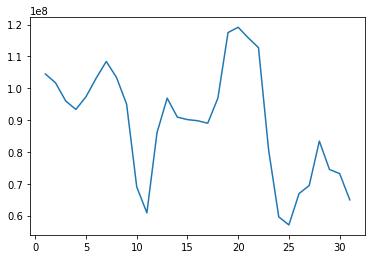

In [28]:
plt.plot(em_df['Total Emissions'])